Use wine dataset from sklearn.datasets to classify wines into 3 categories. Load the dataset and split it into test and train. After that train the model using Gaussian and Multinominal classifier and find which model performs better. Use the trained model to perform some predictions on test data.

In [126]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB, MultinomialNB

## Data analysis

In [127]:
wine = load_wine()
wine

{'data': array([[1.423e+01, 1.710e+00, 2.430e+00, ..., 1.040e+00, 3.920e+00,
         1.065e+03],
        [1.320e+01, 1.780e+00, 2.140e+00, ..., 1.050e+00, 3.400e+00,
         1.050e+03],
        [1.316e+01, 2.360e+00, 2.670e+00, ..., 1.030e+00, 3.170e+00,
         1.185e+03],
        ...,
        [1.327e+01, 4.280e+00, 2.260e+00, ..., 5.900e-01, 1.560e+00,
         8.350e+02],
        [1.317e+01, 2.590e+00, 2.370e+00, ..., 6.000e-01, 1.620e+00,
         8.400e+02],
        [1.413e+01, 4.100e+00, 2.740e+00, ..., 6.100e-01, 1.600e+00,
         5.600e+02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1

In [128]:
dir(wine)

['DESCR', 'data', 'feature_names', 'frame', 'target', 'target_names']

In [129]:
list(wine.feature_names)

['alcohol',
 'malic_acid',
 'ash',
 'alcalinity_of_ash',
 'magnesium',
 'total_phenols',
 'flavanoids',
 'nonflavanoid_phenols',
 'proanthocyanins',
 'color_intensity',
 'hue',
 'od280/od315_of_diluted_wines',
 'proline']

In [130]:
list(wine.target_names)

['class_0', 'class_1', 'class_2']

In [131]:
df = pd.DataFrame(data=wine.data, columns=wine.feature_names)
df

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0


In [132]:
df['target'] = wine.target
df

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0,2
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0,2
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0,2
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0,2


In [133]:
df.select_dtypes(include=[np.number]).groupby('target').mean()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
target,,,,,,,,,,,,,
0,13.744746,2.010678,2.455593,17.037288,106.338983,2.840169,2.982373,0.290000,1.899322,5.528305,1.062034,3.157797,1115.711864
1,12.278732,1.932676,2.244789,20.238028,94.549296,2.258873,2.080845,0.363662,1.630282,3.086620,1.056282,2.785352,519.507042
2,13.153750,3.333750,2.437083,21.416667,99.312500,1.678750,0.781458,0.447500,1.153542,7.396250,0.682708,1.683542,629.895833


## Data Preprocessing

In [134]:
df.drop(['ash', 'proanthocyanins', 'nonflavanoid_phenols'], axis='columns', inplace=True)
df

,alcohol,malic_acid,alcalinity_of_ash,magnesium,total_phenols,flavanoids,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,15.6,127.0,2.80,3.06,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,11.2,100.0,2.65,2.76,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,18.6,101.0,2.80,3.24,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,16.8,113.0,3.85,3.49,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,21.0,118.0,2.80,2.69,4.32,1.04,2.93,735.0,0
...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,20.5,95.0,1.68,0.61,7.70,0.64,1.74,740.0,2
174,13.40,3.91,23.0,102.0,1.80,0.75,7.30,0.70,1.56,750.0,2
175,13.27,4.28,20.0,120.0,1.59,0.69,10.20,0.59,1.56,835.0,2
176,13.17,2.59,20.0,120.0,1.65,0.68,9.30,0.60,1.62,840.0,2


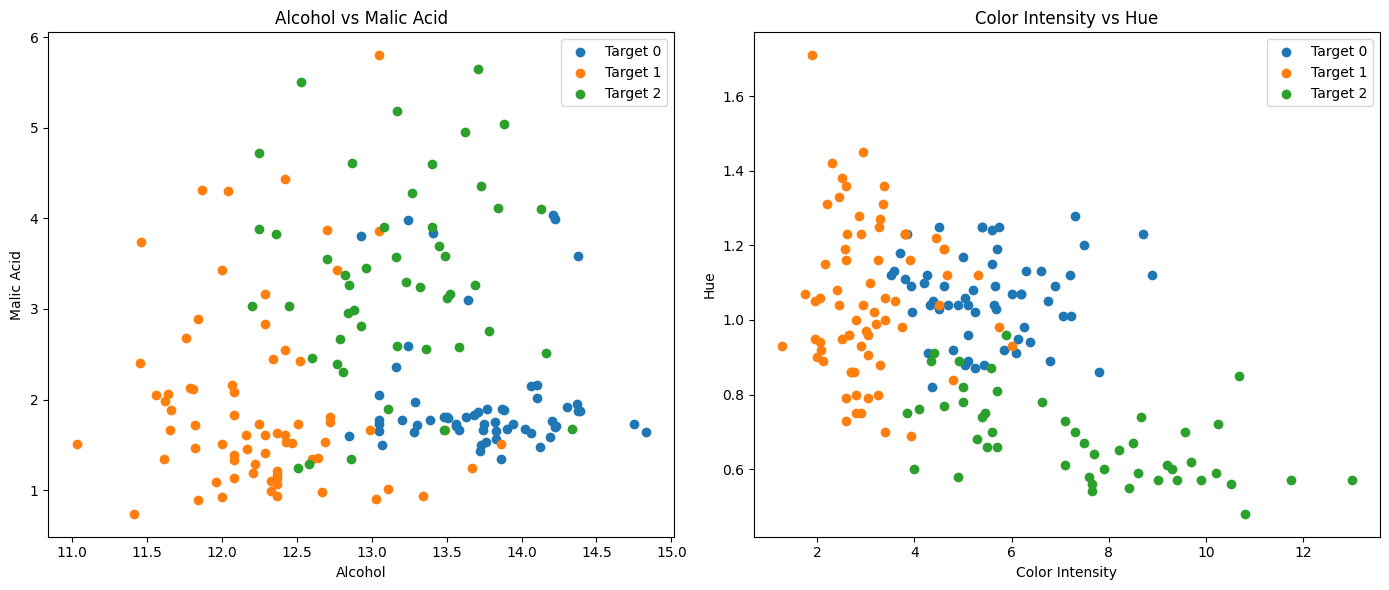

In [135]:
# Create scatter plots for different pairs of features
plt.figure(figsize=(14, 6))

# Subplot for alcohol vs malic_acid
plt.subplot(1, 2, 1)
for target in df['target'].unique():
    subset = df[df['target'] == target]
    plt.scatter(subset['alcohol'], subset['malic_acid'], label=f'Target {target}')
plt.xlabel('Alcohol')
plt.ylabel('Malic Acid')
plt.legend()
plt.title('Alcohol vs Malic Acid')

# Subplot for color_intensity vs hue
plt.subplot(1, 2, 2)
for target in df['target'].unique():
    subset = df[df['target'] == target]
    plt.scatter(subset['color_intensity'], subset['hue'], label=f'Target {target}')
plt.xlabel('Color Intensity')
plt.ylabel('Hue')
plt.legend()
plt.title('Color Intensity vs Hue')

plt.tight_layout()
plt.show()

## Train Test Split

In [136]:
X = df.drop('target', axis='columns')
X

,alcohol,malic_acid,alcalinity_of_ash,magnesium,total_phenols,flavanoids,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,15.6,127.0,2.80,3.06,5.64,1.04,3.92,1065.0
1,13.20,1.78,11.2,100.0,2.65,2.76,4.38,1.05,3.40,1050.0
2,13.16,2.36,18.6,101.0,2.80,3.24,5.68,1.03,3.17,1185.0
3,14.37,1.95,16.8,113.0,3.85,3.49,7.80,0.86,3.45,1480.0
4,13.24,2.59,21.0,118.0,2.80,2.69,4.32,1.04,2.93,735.0
...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,20.5,95.0,1.68,0.61,7.70,0.64,1.74,740.0
174,13.40,3.91,23.0,102.0,1.80,0.75,7.30,0.70,1.56,750.0
175,13.27,4.28,20.0,120.0,1.59,0.69,10.20,0.59,1.56,835.0
176,13.17,2.59,20.0,120.0,1.65,0.68,9.30,0.60,1.62,840.0


In [137]:
y = df.target
y

0      0
1      0
2      0
3      0
4      0
      ..
173    2
174    2
175    2
176    2
177    2
Name: target, Length: 178, dtype: int32

In [138]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100)

## Model

### GaussianNB

In [139]:
model_g = GaussianNB()
model_g.fit(X_train, y_train)

GaussianNB()

In [140]:
model_g.predict(X_test)

array([1, 2, 0, 1, 2, 2, 1, 1, 1, 1, 2, 1, 2, 2, 2, 0, 2, 0, 1, 0, 2, 0,
       1, 1, 0, 0, 1, 1, 1, 2, 2, 1, 0, 1, 2, 2])

In [141]:
y_test[:10]

88     1
159    2
11     0
74     1
158    2
149    2
99     1
96     1
90     1
95     1
Name: target, dtype: int32

In [142]:
model_g.score(X_test, y_test)

1.0

Text(0.5, 1.0, 'Confusion Matrix')

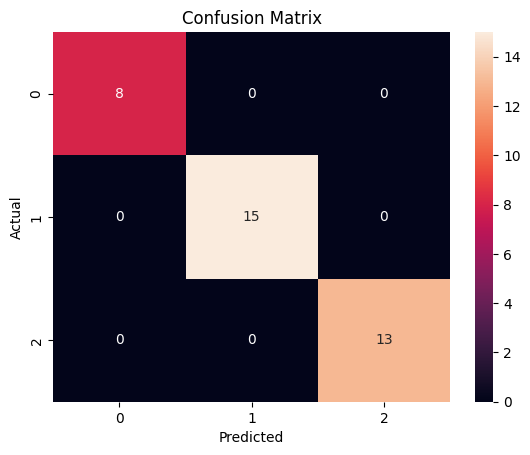

In [143]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

y_pred = model_g.predict(X_test)
cf = confusion_matrix(y_test, y_pred)

sns.heatmap(cf, annot=True, fmt="")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')

### MultinomialNB

In [144]:
model_m = MultinomialNB()
model_m.fit(X_train, y_train)

MultinomialNB()

In [145]:
model_m.predict(X_test)

array([2, 2, 0, 0, 2, 2, 1, 1, 1, 1, 2, 2, 2, 2, 2, 0, 2, 0, 1, 0, 1, 0,
       1, 1, 2, 0, 1, 1, 1, 2, 2, 1, 0, 1, 1, 1])

In [146]:
y_test[:10]

88     1
159    2
11     0
74     1
158    2
149    2
99     1
96     1
90     1
95     1
Name: target, dtype: int32

In [147]:
model_m.score(X_test, y_test)

0.8055555555555556

Text(0.5, 1.0, 'Confusion Matrix')

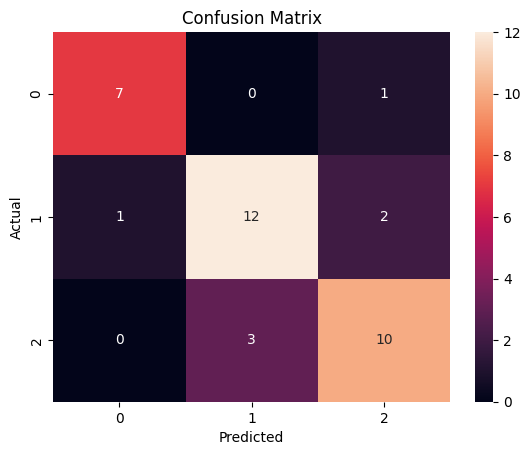

In [148]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

y_pred = model_m.predict(X_test)
cf = confusion_matrix(y_test, y_pred)

sns.heatmap(cf, annot=True, fmt="")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')